Dataset Shape: (5105, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 27 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Fiscal Year                                         5105 non-null   int64  
 1   Library                                             5105 non-null   object 
 2   County                                              5105 non-null   object 
 3   Principal Public?                                   5105 non-null   object 
 4   AENGLC Rank                                         5105 non-null   float64
 5   Population of Service Area                          5105 non-null   float64
 6   Total Library Visits                                5105 non-null   float64
 7   Library Visits Per Capita Served                    5105 non-null   float64
 8   Total Registered Borrowers                          

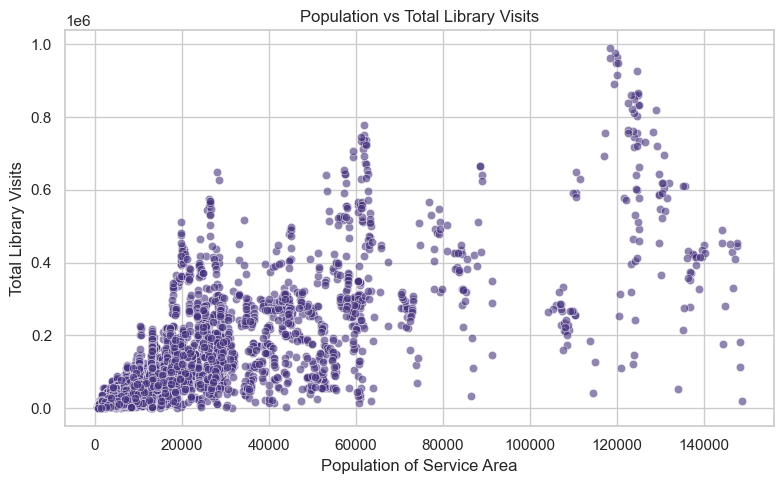

Correlation between Population and Total Library Visits: 0.75


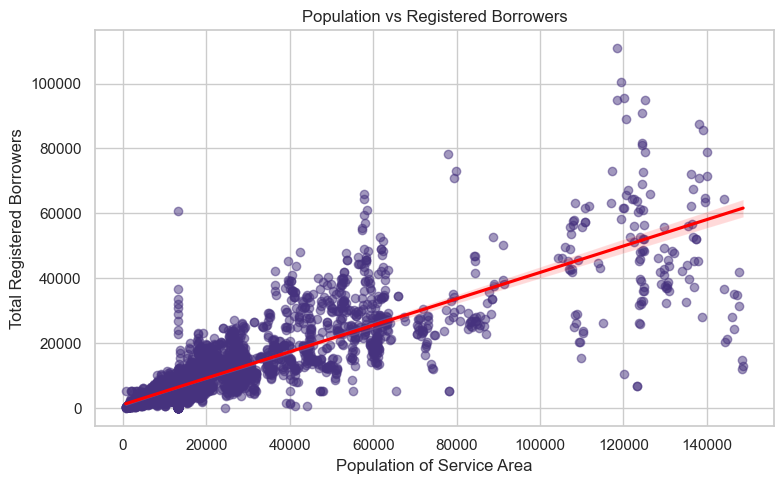

Correlation between Population and Registered Borrowers: 0.85


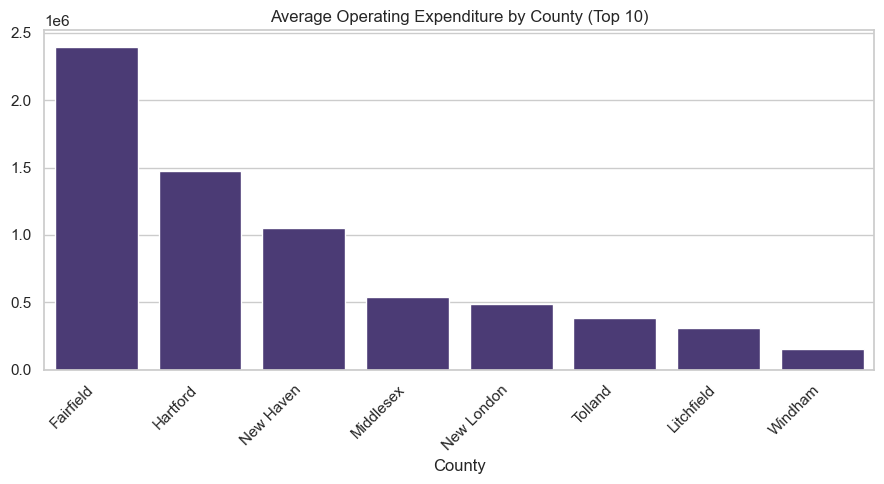

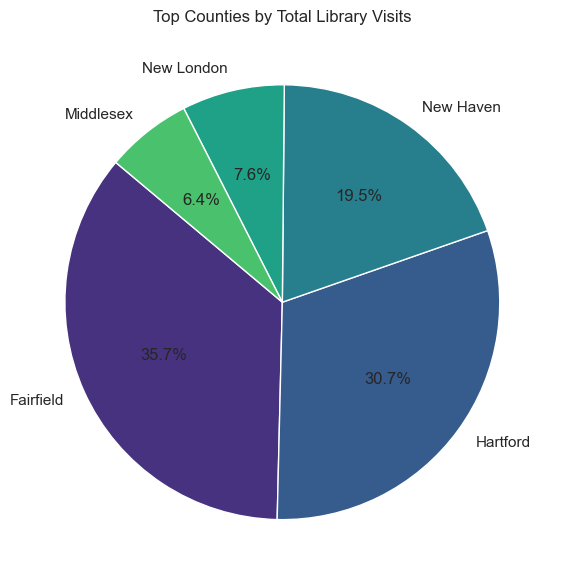

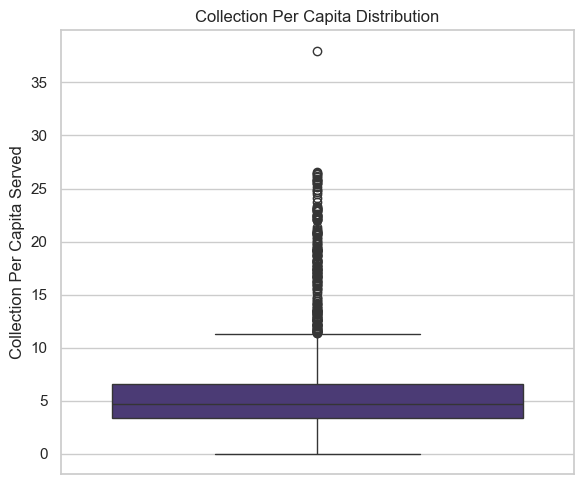


Regression Metrics
MAE : 45651.58654838799
MSE : 5943521627.537629
RMSE: 77094.23861442324
R2  : 0.6951887735477295


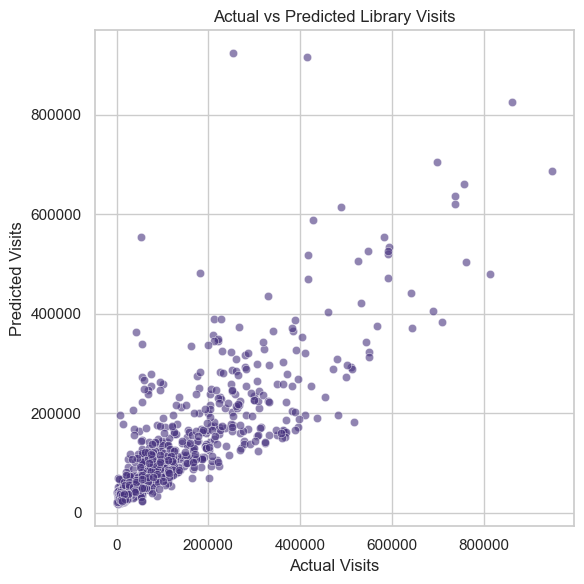


Classification Metrics
Accuracy: 0.8611111111111112
Confusion Matrix:
 [[424  51]
 [ 79 382]]


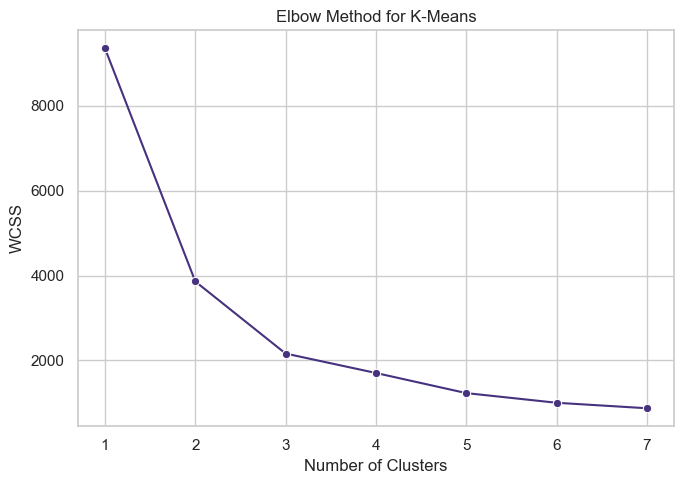

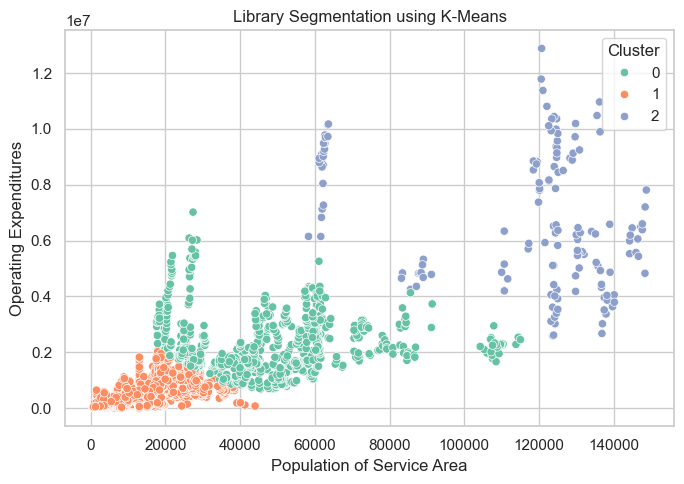

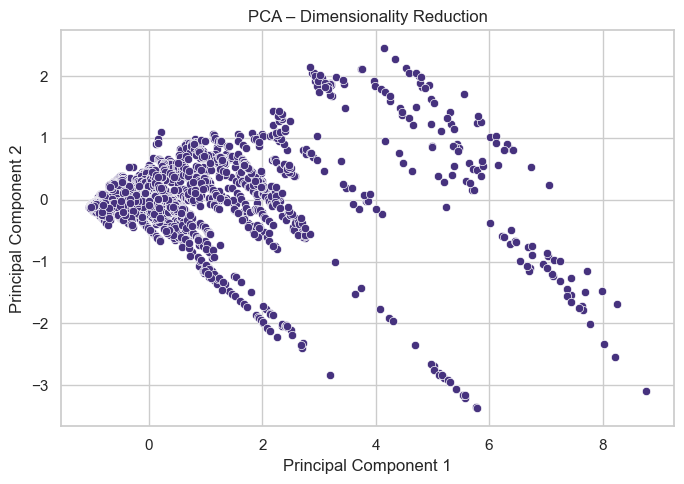


Cross Validation Scores: [ 0.69031998  0.73339492  0.80341633  0.8810454  -0.60228442]
Average CV Score: 0.501178444296955


In [7]:
# INT234 PREDICTIVE ANALYTICS PROJECT
# Dataset: Public Libraries
# Concepts Covered:
# Unit I  : Data Preparation & EDA
# Unit II : Regression + Evaluation
# Unit III: Classification + Metrics
# Unit IV : Clustering (K-Means)
# Unit V  : PCA
# Unit VI : Cross Validation
# STEP 1: IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, confusion_matrix
)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Seaborn theme for BEAUTIFUL plots
sns.set_theme(style="whitegrid", palette="viridis")

# =========================
# STEP 2: LOAD DATASET
# =========================
df = pd.read_csv("C:/Users/Dell/OneDrive/Documents/Public_Libraries (1)_Cleaned.csv")

print("Dataset Shape:", df.shape)
print(df.info())
print(df.head())

# Handle missing values
df = df.dropna()

# =========================================================
# OBJECTIVE 1: DATA UNDERSTANDING & EDA (UNIT I)
# =========================================================

# 🔹 Visualization 1: Population vs Total Visits (Scatter)
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="Population of Service Area",
    y="Total Library Visits",
    alpha=0.6
)
plt.title("Population vs Total Library Visits")
plt.tight_layout()
plt.show()
corr1 = df["Population of Service Area"].corr(df["Total Library Visits"])
print("Correlation between Population and Total Library Visits:", round(corr1, 2))


# 🔹 Visualization 2: Population vs Borrowers (Regression)
plt.figure(figsize=(8,5))
sns.regplot(
    data=df,
    x="Population of Service Area",
    y="Total Registered Borrowers",
    scatter_kws={"alpha":0.5},
    line_kws={"color":"red"}
)
plt.title("Population vs Registered Borrowers")
plt.tight_layout()
plt.show()
corr2 = df["Population of Service Area"].corr(df["Total Registered Borrowers"])
print("Correlation between Population and Registered Borrowers:", round(corr2, 2))




# 🔹 Visualization 3: Avg Operating Expenditure by County (Bar)
avg_exp = (
    df.groupby("County")["Operating Expenditures"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(9,5))
sns.barplot(x=avg_exp.index, y=avg_exp.values)
plt.xticks(rotation=45, ha="right")
plt.title("Average Operating Expenditure by County (Top 10)")
plt.tight_layout()
plt.show()

# 🔹 Visualization 4: Top Counties by Visits (Pie)
top_visits = (
    df.groupby("County")["Total Library Visits"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(6,6))
plt.pie(
    top_visits,
    labels=top_visits.index,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Top Counties by Total Library Visits")
plt.tight_layout()
plt.show()

# 🔹 Visualization 5: Collection Per Capita (Box Plot)
plt.figure(figsize=(6,5))
sns.boxplot(y="Collection Per Capita Served", data=df)
plt.title("Collection Per Capita Distribution")
plt.tight_layout()
plt.show()

# =========================================================
# OBJECTIVE 2: REGRESSION (UNIT II)
# =========================================================

# Features & Target
X = df[[
    "Population of Service Area",
    "Total Registered Borrowers",
    "Operating Expenditures"
]]
y = df["Total Library Visits"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Prediction
y_pred = reg_model.predict(X_test)

# Evaluation Metrics
print("\nRegression Metrics")
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2  :", r2_score(y_test, y_pred))

# 🔹 Actual vs Predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Visits")
plt.ylabel("Predicted Visits")
plt.title("Actual vs Predicted Library Visits")
plt.tight_layout()
plt.show()

# =========================================================
# OBJECTIVE 3: CLASSIFICATION (UNIT III)
# =========================================================

# Create Binary Target
df["Usage_Level"] = (df["Total Library Visits"] >
                     df["Total Library Visits"].median()).astype(int)

X_cls = df[["Population of Service Area", "Operating Expenditures"]]
y_cls = df["Usage_Level"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

# Logistic Regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

# Metrics
print("\nClassification Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# =========================================================
# OBJECTIVE 4: CLUSTERING (UNIT IV)
# =========================================================

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cls)

# Elbow Method
wcss = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
sns.lineplot(x=range(1,8), y=wcss, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for K-Means")
plt.tight_layout()
plt.show()

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Cluster Visualization
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="Population of Service Area",
    y="Operating Expenditures",
    hue="Cluster",
    palette="Set2"
)
plt.title("Library Segmentation using K-Means")
plt.tight_layout()
plt.show()

# =========================================================
# OBJECTIVE 5: PCA & MODEL PERFORMANCE (UNIT V & VI)
# =========================================================

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA – Dimensionality Reduction")
plt.tight_layout()
plt.show()

# Cross Validation
cv_scores = cross_val_score(reg_model, X, y, cv=5)
print("\nCross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())


# END OF PROJECT CODE

In [3]:
!pip install seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
